## MASTER DATA SCIENCE: NUCLIO
### PROFESOR: JOSEPH GALLART
### PROJECT TRENMAX 2/2
### Silvia, Wesley, Daniela

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
#IMPORTAMOS LAS LIBRERÍAS

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [2]:
#LEER EL ARCHIVO PICKLE
df_renfe_recuperado=pd.read_pickle("df_renfe_clean.pkl")

In [3]:
df_renfe_recuperado.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,...,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES,RUTA
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,...,5,20,Friday,28,6,23,Friday,28,6,SEVILLA MADRID
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,...,6,10,Sunday,14,7,13,Sunday,14,7,BARCELONA MADRID
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,...,4,13,Thursday,23,5,16,Thursday,23,5,SEVILLA MADRID
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,...,5,14,Wednesday,29,5,22,Wednesday,29,5,VALENCIA MADRID
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,...,5,13,Wednesday,26,6,16,Wednesday,26,6,MADRID BARCELONA


### PREGUNTA 1
##### Hola Juan, nuevamente Pedro por aquí, luego de hacer el análisis vamos a preparar nuestro dataset para hacer el modelo, para ello vamos a importar el dataset que está en un pickle, luego de ello por favor dime si hay variables correlacionadas, de ser así elimínalas por favor.

R: 'FECHA_INICIO_DIA' con 'FECHA_FIN_DIA' y 'FECHA_INICIO_MES' con 'FECHA_FIN_MES'

In [4]:
df_renfe_preprocesing =df_renfe_recuperado.copy()

In [5]:
corr = df_renfe_preprocesing.corr(numeric_only=True)

In [6]:
corr.style.background_gradient(cmap='Oranges')

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.234128,-0.242212,0.004322,-0.004429,-0.101142,0.062088,0.033258,-0.188555,-0.030274,0.033258,-0.188555
TIEMPO_VIAJE,-0.234128,1.000000,0.018297,-0.003846,-0.004647,-0.010935,-0.210673,-0.007194,-0.001396,0.135683,-0.007194,-0.001396
DIF_INI_BUS,-0.242212,0.018297,1.000000,0.003600,0.000414,0.078363,0.002825,-0.029557,0.450001,0.010536,-0.029557,0.450001
FECHA_CONSULTA_HORA,0.004322,-0.003846,0.003600,1.000000,-0.006662,0.008991,0.000085,-0.004670,0.015603,-0.001400,-0.004670,0.015603
FECHA_CONSULTA_DIA,-0.004429,-0.004647,0.000414,-0.006662,1.000000,-0.282488,0.000249,-0.002721,-0.065396,-0.001332,-0.002721,-0.065396
FECHA_CONSULTA_MES,-0.101142,-0.010935,0.078363,0.008991,-0.282488,1.000000,-0.001552,-0.083330,0.881646,-0.002555,-0.083330,0.881646
FECHA_INICIO_HORA,0.062088,-0.210673,0.002825,0.000085,0.000249,-0.001552,1.000000,0.003729,-0.005534,0.935601,0.003729,-0.005534
FECHA_INICIO_DIA,0.033258,-0.007194,-0.029557,-0.004670,-0.002721,-0.083330,0.003729,1.000000,-0.294364,0.000769,1.000000,-0.294364
FECHA_INICIO_MES,-0.188555,-0.001396,0.450001,0.015603,-0.065396,0.881646,-0.005534,-0.294364,1.000000,-0.002983,-0.294364,1.000000
FECHA_FIN_HORA,-0.030274,0.135683,0.010536,-0.001400,-0.001332,-0.002555,0.935601,0.000769,-0.002983,1.000000,0.000769,-0.002983


In [7]:
del(df_renfe_preprocesing['FECHA_FIN_DIA'])

In [ ]:
#Renombrar la variable a FECHA_DIA


In [8]:
del(df_renfe_preprocesing['FECHA_FIN_MES'])

In [9]:
#Renombrar la variable a FECHA_MES

In [10]:
df_renfe_preprocesing.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,RUTA
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,SEVILLA MADRID
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,BARCELONA MADRID
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,SEVILLA MADRID
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,VALENCIA MADRID
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,MADRID BARCELONA


### PREGUNTA 2 
##### Perfecto Juan (o eso espero) he visto que la distribución del precio tiene una distribución un poco extraña, ¿Me puedes explicar? y ¿Qué podríamos hacer al respecto?

<Axes: >

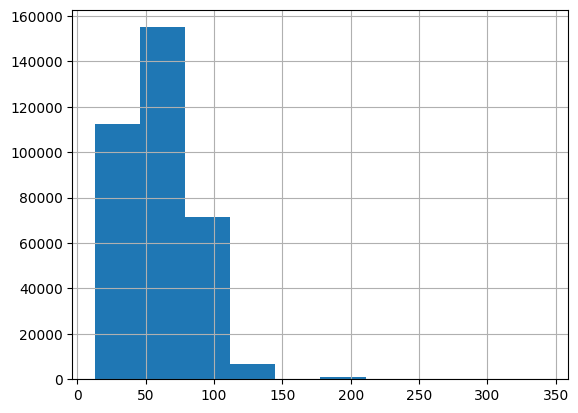

In [12]:
df_renfe_preprocesing['PRECIO'].hist()

In [13]:
df_renfe_preprocesing['LOG_PRECIO']=np.log10(df_renfe_preprocesing['PRECIO'])

<Axes: >

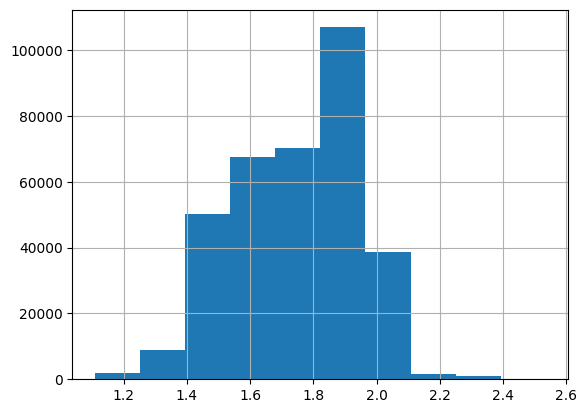

In [14]:
df_renfe_preprocesing['LOG_PRECIO'].hist()

In [15]:
del(df_renfe_preprocesing['PRECIO'])

In [16]:
df_renfe_preprocesing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346812 entries, 0 to 383567
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             346812 non-null  object 
 1   CIUDAD_DESTINO            346812 non-null  object 
 2   TIPO_TREN                 346812 non-null  object 
 3   TIPO_TARIFA               346812 non-null  object 
 4   CLASE                     346812 non-null  object 
 5   TIEMPO_VIAJE              346812 non-null  float64
 6   DIF_INI_BUS               346812 non-null  float64
 7   FECHA_CONSULTA_HORA       346812 non-null  int32  
 8   FECHA_CONSULTA_NOMBREDIA  346812 non-null  object 
 9   FECHA_CONSULTA_DIA        346812 non-null  int32  
 10  FECHA_CONSULTA_MES        346812 non-null  int32  
 11  FECHA_INICIO_HORA         346812 non-null  int32  
 12  FECHA_INICIO_NOMBREDIA    346812 non-null  object 
 13  FECHA_INICIO_DIA          346812 non-null  int32 

### PREGUNTA 3
##### Gracias Juan, vamos a hacer un análisis de cómo se comportan las variables con respecto al precio, como son muchas pon especial atención en el día de inicio del viaje (lunes, martes, miércoles...) vs el precio, ¿Ves alguna relación? (usar violinplot)

<Axes: xlabel='FECHA_INICIO_NOMBREDIA', ylabel='LOG_PRECIO'>

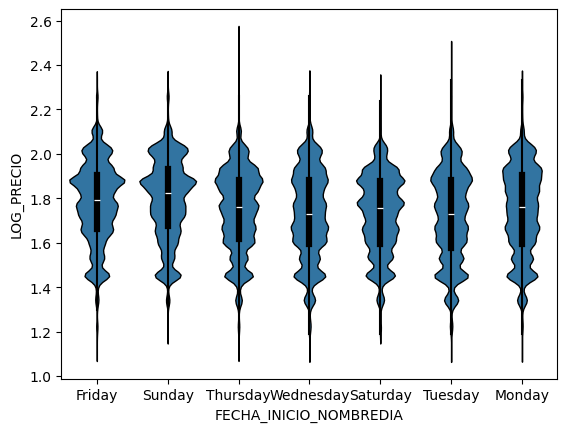

In [18]:
sns.violinplot(x='FECHA_INICIO_NOMBREDIA', y='LOG_PRECIO', linewidth=1,linecolor="k", data=df_renfe_preprocesing)

### PREGUNTA 4
##### También podemos hacer un análisis entre el tiempo de viaje y el precio, ¿Ves alguna relación? (usar scatterplot, si demora mucho hacer una muestra del dataset)

<Axes: xlabel='TIEMPO_VIAJE', ylabel='LOG_PRECIO'>

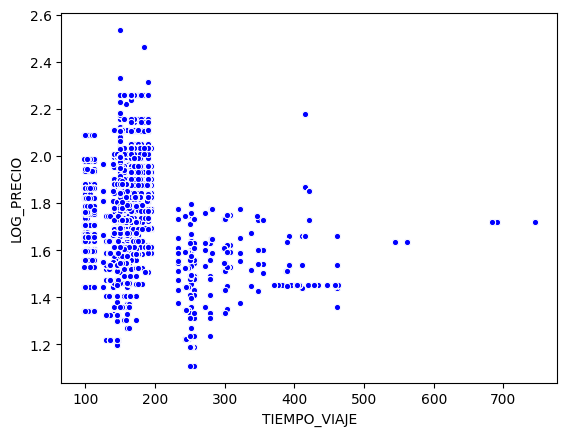

In [19]:
sns.scatterplot(x='TIEMPO_VIAJE', y='LOG_PRECIO', s=80, color="blue", marker=".", data=df_renfe_preprocesing)

### PREGUNTA 5
##### Separemos nuestras variables, entre Listas_Categoricas, Listas_Numericas y Listas_Boolean, antes de eso podemos eliminar algunas columnas que a criterio de negocio podemos eliminar, ¿Cierto? Perfecto! voy a empezar a hacer el tratamiento con las Listas_Categoricas, he decidido aplicar un OneHotEncoding, eso ¿Qué significa? ¿Me lo recuerdas? ¡Vamos a hacerlo!

(TIENE ALTERNATIVAS)

### PREGUNTA 6
##### Ahora las Listas_Numericas, un MinMaxScaler iría bien, ¿Qué significa eso?  ¡Vamos a hacerlo!

(TIENE ALTERNATIVAS)

### PREGUNTA 7
##### Genial lo tenemos todo, ahora te voy a ayudar a hacer el modelo (en caso nos de el tiempo!), será tu primer modelo, ¿Verdad? :), cuando terminemos envíame el fichero que has desarrollado, mil gracias!